In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [82]:
# data = pd.read_csv('C:/users/Neal/Downloads/purple_data/full_sweep_purple_100mv.csv', nrows=1200)
# 

In [83]:
# plt.plot(data['Time (us)'], data['Volts (mV)'])
# plt.show()

In [84]:
# plt.plot(data['Time (us)'], data['Amps (mA)'])
# plt.show()

In [85]:
# data2 = pd.read_csv('C:/users/Neal/Downloads/purple_data/full_sweep_purple_50mv.csv', nrows=1200, skiprows=1201)

In [86]:
# data2.head()

In [87]:
# plt.plot(data2['Time (us)'], data2['Volts (mV)'])
# plt.show()

In [98]:
full_data = pd.read_csv('C:/users/Neal/Downloads/purple_data/10hz_20x_purple_100mv.csv')
full_data.shape

(24019, 4)

In [99]:
def phase_correction(i, v, cyc):
    v_shifted = np.zeros(v.size, dtype = np.complex128)
    i_shifted = np.zeros(v.size, dtype = np.complex128)
    index = cyc
    N = len(v)
    i_phase_reference = 0
    phase_correction = i_phase_reference - np.arctan2(np.imag(i[index]),np.real(i[index]))
    for k in range(1, N/2):
        v_phase_corrected = math.fmod((k/float(index))*phase_correction + np.arctan2(np.imag(v[k]),np.real(v[k])),2*np.pi)
        v_shifted[k] = np.abs(v[k])*np.cos(v_phase_corrected) + 1j*np.abs(v[k])*np.sin(v_phase_corrected)
        v_shifted[N - k] = np.real(v_shifted[k]) - 1j*np.imag(v_shifted[k])
        
        i_phase_corrected = (k/float(index))*phase_correction + np.arctan2(np.imag(i[k]),np.real(i[k]))
        i_shifted[k] = np.abs(i[k])*np.cos(i_phase_corrected) + 1j*np.abs(i[k])*np.sin(i_phase_corrected)
        i_shifted[N - k] = np.real(i_shifted[k]) - 1j*np.imag(i_shifted[k])
    return i_shifted, v_shifted

In [100]:
#Parse the data, split into each run
# full_data = np.array(full_data)
# tally=[]
# for i in range(full_data.shape[0]):
#     if str(full_data[i][3]) != 'nan':
#         if str(full_data[i][3])!= 'Frequency (Hz)':
#             tally.append(i)
# #             print float(full_data[i,3])/10
# volts = pd.DataFrame(columns=range(1200),dtype=np.float64)
# times = pd.DataFrame(columns=range(1200),dtype=np.float64)
# freq = pd.DataFrame(columns=range(1),dtype=np.float64)
# print tally
# for i in range(len(tally)):
    

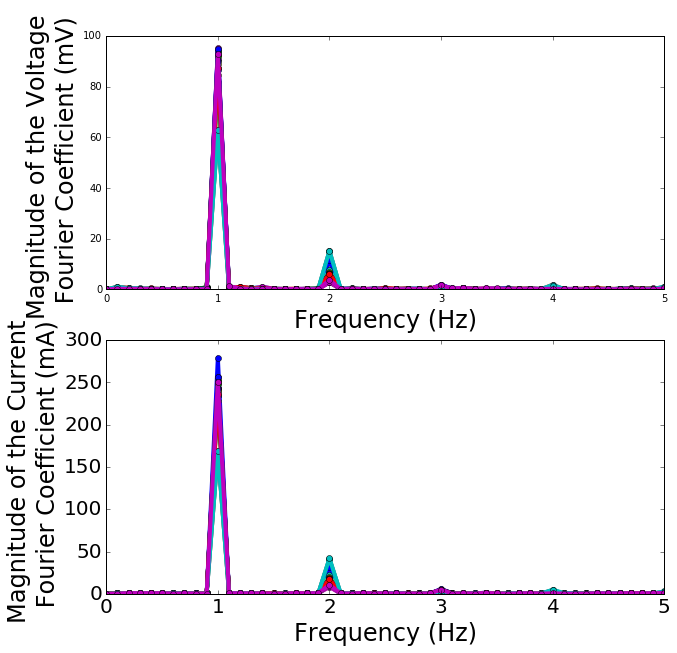

In [101]:
fourier = plt.figure(3, figsize=(10,10))
fourierV = fourier.add_subplot(211)
fourierI = fourier.add_subplot(212)
ff = []
Z = []

# fig = plt.figure(1, figsize=(5,5))
length=1200
points=[120.,60.,30.,12.,6.]

for i in range(len(full_data)/length-1):
    data = full_data.loc[(length+1)*i:(length+1)*i+(length-1)]
#     print data.iloc[0]
    f = float(data['Frequency (Hz)'].iloc[0])/10
    if f<=25:
        point=points[0]
    if f>25:
        point=points[1]
    if f>50:
        point=points[2]
    if f>100:
        point=points[3]
    if f>400:
        point=points[4]
    #     print f
    t = data['Time (us)'].astype(float)
    v = data['Volts (mV)'].astype(float)
    i = data['Amps (mA)'].astype(float)
    
    f_actual = 1000000/(t.iloc[length-1]/1200)/point
#     print f_actual
#     plt.plot(t, v)
    N = len(v)
    cyc = length/point
    index=int(cyc)
    M = (np.concatenate([np.arange(0,N/2),np.arange(-N/2,0)])/cyc).tolist()
    v_hat = np.fft.fft(v - v.mean())/(N/2)
    i_hat = np.fft.fft(i - i.mean())/(N/2)
    i_hat_shift, v_hat_shift = phase_correction(i_hat, v_hat, index)
   
    ff.append(float(f_actual))
    Z.append(v_hat_shift[index]/i_hat_shift[index])
    
    fourierV.plot(M[0:N/2], np.abs(v_hat[0:N/2]), 'o-',linewidth=4, label = f,)
    fourierV.set_ylabel('Magnitude of the Voltage \n Fourier Coefficient (mV)', fontsize=24)
    fourierV.set_xlabel('Frequency (Hz)', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=20)
    
    fourierI.plot(M[0:N/2], np.abs(i_hat[0:N/2]), 'o-',linewidth=4, label = f,)
    fourierI.set_ylabel('Magnitude of the Current \n Fourier Coefficient (mA)', fontsize=24)
    fourierI.set_xlabel('Frequency (Hz)', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=20)
    
    
fourierV.set_xlim([0,5])
fourierI.set_xlim([0,5])
plt.show()

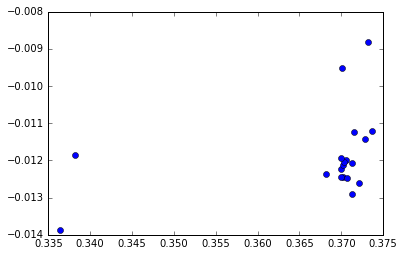

In [102]:
plt.plot(np.real(Z), np.imag(Z), 'o')
plt.show()